# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [448]:
df = pd.read_csv("data_1C.csv")
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,8232,33,admin.,single,university.degree,no,no,no,telephone,may,tue,147.0,1,999,0,nonexistent,no
8233,8233,39,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,793.0,5,999,0,nonexistent,no
8234,8234,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120.0,2,999,0,nonexistent,no
8235,8235,50,admin.,married,university.degree,no,yes,yes,cellular,nov,fri,189.0,2,999,1,failure,no


In [449]:
df.shape

(8237, 17)

Dataset ini terdiri atas 8237 samples (baris data) dengan 17 features (kolom data)

In [450]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8227 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8222 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


# Data Cleaning

In [452]:
df.isna().sum()

Unnamed: 0      0
age             0
job            10
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       15
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [453]:
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage

Unnamed: 0     0.000000
age            0.000000
job            0.121403
marital        0.000000
education      0.000000
default        0.000000
housing        0.000000
loan           0.000000
contact        0.000000
month          0.000000
day_of_week    0.000000
duration       0.182105
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.000000
y              0.000000
dtype: float64

Terdapat beberapa missing values dalam kolom `job` dan `duration`, dengan jumlah yang relatif kecil yaitu 10 dan 15 entri serta persentase dibawah 1% dari keseluruhan data. Dengan mempertimbangkan proporsi yang rendah dari missing values tersebut terhadap keseluruhan dataset, opsi yang paling tepat adalah menghapus baris yang mengandung nilai-nilai yang hilang tersebut.

Proses penghapusan ini dilakukan karena pengaruhnya yang minimal terhadap integritas data secara keseluruhan. Dengan membuang entri yang memiliki nilai yang hilang, kualitas data yang tinggi dapat dipertahankan tanpa mengorbankan signifikansi dari dataset. 

In [454]:
df.dropna(subset=['job', 'duration'], inplace=True)
df.isna().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Dataset sudah bersih dari missing values

In [455]:
print('Number of Duplicated Data:', df.duplicated().sum())

Number of Duplicated Data: 0


Dataset juga sudah bersih dari duplicated values.

In [456]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
0       1
5411    1
5506    1
5505    1
5504    1
       ..
2741    1
2740    1
2739    1
2738    1
8236    1
Name: count, Length: 8212, dtype: int64

Setelah menganalisa unique value dari kolom `Unnamed: 0`, ternyata kolom tersebut tidak memberikan informasi yang relevan atau bermanfaat dalam analisis data. Kolom `Unnamed: 0` tampaknya merupakan indeks atau nomor baris yang dihasilkan saat menyimpan atau memuat data dari atau ke dalam format file tertentu. Informasi ini tidak memberikan kontribusi apa pun terhadap pemahaman atau analisis data, karena hanya merupakan identifikasi baris yang otomatis dihasilkan. Dalam konteks analisis data, ini dianggap sebagai metadata yang tidak relevan dan dapat diabaikan.

In [457]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


Kolom index tersebut sudah berhasil didrop sehingga dataset menjadi lebih sederhana dan berisi informasi yang relevan saja.

In [458]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
8232,33,admin.,single,university.degree,no,no,no,telephone,may,tue,147.0,1,999,0,nonexistent,no
8233,39,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,793.0,5,999,0,nonexistent,no
8234,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120.0,2,999,0,nonexistent,no
8235,50,admin.,married,university.degree,no,yes,yes,cellular,nov,fri,189.0,2,999,1,failure,no
8236,29,admin.,single,university.degree,no,yes,no,telephone,may,wed,713.0,1,999,0,nonexistent,no


filtered_df dibuat untuk tujuan test case prediction di FastAPI nanti (secara random)

In [465]:
filtered_df = df[df['y'] == 'yes']
filtered_df = filtered_df[filtered_df['age'] == 42]
filtered_df = filtered_df[filtered_df['marital'] == 'single']
filtered_df = filtered_df[filtered_df['default'] == 'no']
filtered_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
4664,42,admin.,single,university.degree,no,yes,yes,telephone,may,wed,938.0,1,999,0,nonexistent,yes
5859,42,unknown,single,university.degree,no,no,no,cellular,jul,fri,366.0,6,999,0,nonexistent,yes
6874,42,admin.,single,high.school,no,no,no,cellular,sep,wed,638.0,1,14,1,success,yes


In [392]:
for column in df.columns:
    unique = df[column].value_counts()
    print("Column", column, ":", unique)
    print('')

Column age : age
31    375
32    374
36    367
34    364
35    362
     ... 
17      2
83      2
98      1
84      1
87      1
Name: count, Length: 73, dtype: int64

Column job : job
admin.           2045
blue-collar      1856
technician       1371
services          774
management        625
retired           338
self-employed     293
entrepreneur      278
unemployed        201
housemaid         188
student           181
unknown            62
Name: count, dtype: int64

Column marital : marital
married     4932
single      2337
divorced     930
unknown       13
Name: count, dtype: int64

Column education : education
university.degree      2454
high.school            1894
basic.9y               1154
professional.course    1064
basic.4y                860
basic.6y                454
unknown                 326
illiterate                6
Name: count, dtype: int64

Column default : default
no         6517
unknown    1692
yes           3
Name: count, dtype: int64

Column housing : housing
y

# Exploratory Data Analysis

Saya melakukan pemisahan untuk column numerical dan categorical untuk memudahkan dalam proses analisis

In [393]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
print("Categorical Columns:", categorical_columns)
print("Numeric Columns:", numeric_columns)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous']


## Numerical

### Descriptive Statistics

In [394]:
df[numeric_columns].describe()

,age,duration,campaign,pdays,previous
count,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000
mean,39.992450,260.300049,2.556746,962.240867,0.172552
std,10.329014,254.984098,2.665278,187.495789,0.482364
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,184.000000,2.000000,999.000000,0.000000
75%,47.000000,324.000000,3.000000,999.000000,0.000000
max,98.000000,3284.000000,43.000000,999.000000,6.000000


Berdasarkan statistik deskriptif diatas, berikut adalah beberapa insight penting:

1. **Kolom `age`:**
   - **Mean:** Rata-rata usia nasabah adalah sekitar 40 tahun.
   - **Std:** Standar deviasi sebesar 10.33 menunjukkan variasi usia yang cukup besar di antara nasabah.
   - **Min dan Max:** Usia termuda adalah 17 tahun dan tertua adalah 98 tahun, menunjukkan rentang usia yang sangat luas.
   - **Percentiles:** Usia 25% nasabah berada di bawah 32 tahun, 50% (median) di bawah 38 tahun, dan 75% di bawah 47 tahun. Ini menunjukkan distribusi usia yang miring ke kanan (lebih banyak nasabah yang lebih muda).

2. **Kolom `duration`:**
   - **Mean:** Rata-rata durasi kontak adalah sekitar 260 detik.
   - **Std:** Standar deviasi sebesar 254.98 menunjukkan variasi durasi kontak yang signifikan.
   - **Min dan Max:** Durasi kontak terpendek adalah 0 detik (mungkin kesalahan atau panggilan yang tidak terjawab) dan terlama adalah 3284 detik.
   - **Percentiles:** 25% kontak berlangsung kurang dari 103 detik, median kontak berlangsung 184 detik, dan 75% kontak berlangsung kurang dari 324 detik. Ini menunjukkan adanya beberapa durasi kontak yang sangat lama yang dapat mempengaruhi rata-rata.

3. **Kolom `campaign`:**
   - **Mean:** Rata-rata jumlah kontak yang dilakukan dalam kampanye adalah sekitar 2.56 kali.
   - **Std:** Standar deviasi sebesar 2.66 menunjukkan variasi dalam jumlah kontak yang dilakukan.
   - **Min dan Max:** Jumlah kontak terendah adalah 1 kali dan tertinggi adalah 43 kali.
   - **Percentiles:** 25% nasabah dihubungi hanya sekali, median dihubungi dua kali, dan 75% dihubungi tiga kali atau lebih. Ini menunjukkan sebagian besar nasabah dihubungi beberapa kali dalam kampanye.

4. **Kolom `pdays`:**
   - **Mean:** Rata-rata `pdays` adalah sekitar 962 hari, yang mendekati 999, menunjukkan banyak nasabah yang tidak dihubungi dalam kampanye sebelumnya.
   - **Std:** Standar deviasi sebesar 187.50 menunjukkan adanya beberapa variasi kecil selain nilai 999.
   - **Min dan Max:** Nilai minimum adalah 0 dan maksimum adalah 999.
   - **Percentiles:** Karena sebagian besar nilai adalah 999 (nasabah tidak dihubungi sebelumnya), statistik deskriptif tidak memberikan banyak informasi tentang distribusi yang sesungguhnya dari hari-hari sejak kontak terakhir untuk nasabah yang pernah dihubungi.

5. **Kolom `previous`:**
   - **Mean:** Rata-rata jumlah kontak sebelumnya adalah sekitar 0.17 kali.
   - **Std:** Standar deviasi sebesar 0.48 menunjukkan sebagian besar nasabah memiliki sedikit atau tidak ada kontak sebelumnya.
   - **Min dan Max:** Jumlah kontak sebelumnya terendah adalah 0 dan tertinggi adalah 6 kali.
   - **Percentiles:** 25%, 50%, dan 75% nasabah tidak memiliki kontak sebelumnya (nilai semua 0), menunjukkan sebagian besar nasabah tidak dihubungi dalam kampanye sebelumnya.

Kesimpulannya: Sebagian besar nasabah dalam dataset ini belum dihubungi sebelumnya atau hanya dihubungi beberapa kali. Durasi kontak yang sangat bervariasi menunjukkan bahwa beberapa interaksi mungkin lebih mendalam atau membutuhkan waktu lebih lama daripada yang lain. Usia nasabah juga bervariasi secara signifikan, yang dapat mempengaruhi strategi pemasaran yang digunakan.

### Data Distribution using Histogram

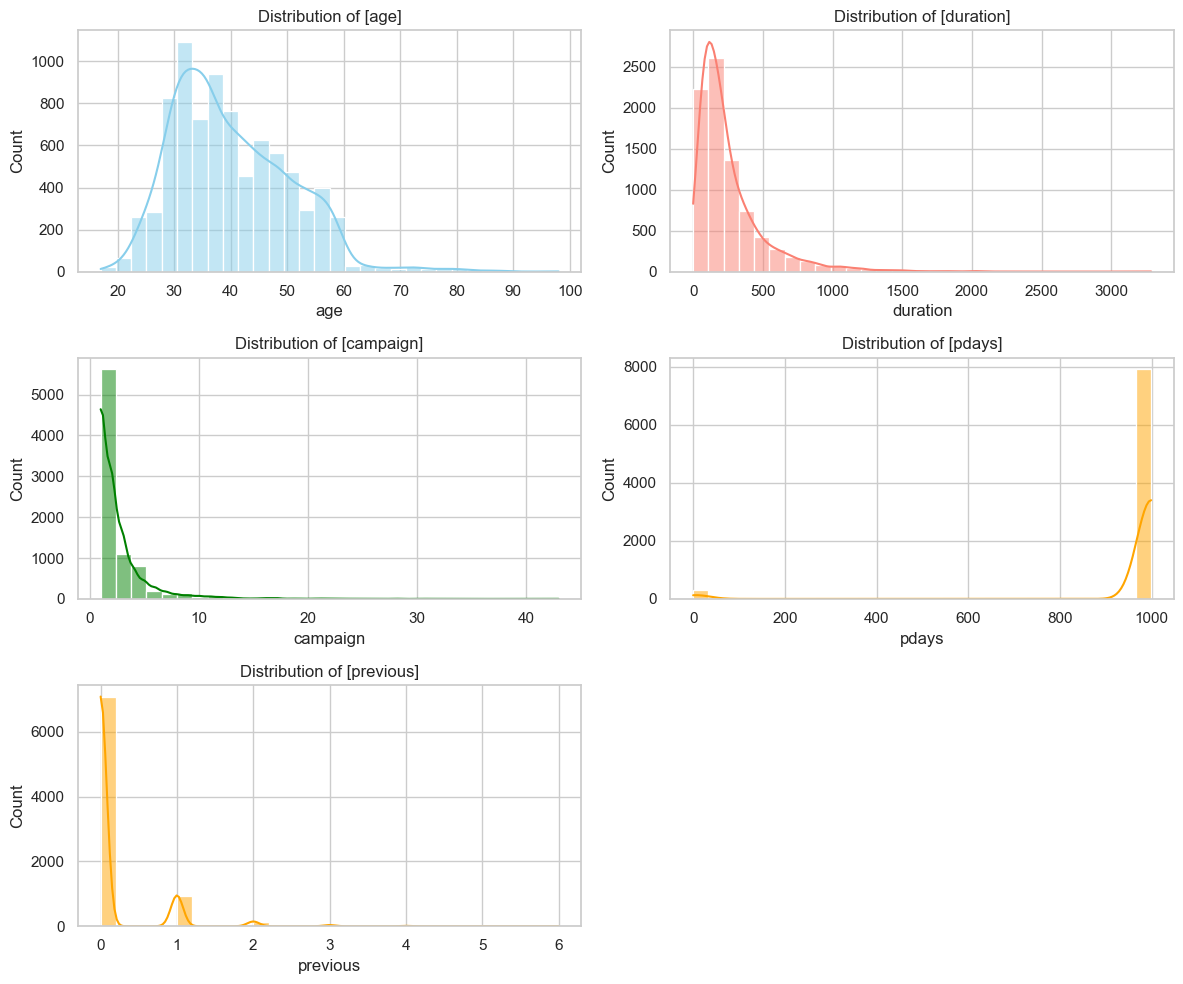

In [395]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
sns.histplot(data=df, x='age', kde=True, color='skyblue', bins=30)
plt.title('Distribution of [age]')

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='duration', kde=True, color='salmon', bins=30)
plt.title('Distribution of [duration]')

plt.subplot(3, 2, 3)
sns.histplot(data=df, x='campaign', kde=True, color='green', bins=30)
plt.title('Distribution of [campaign]')

plt.subplot(3, 2, 4)
sns.histplot(data=df, x='pdays', kde=True, color='orange', bins=30)
plt.title('Distribution of [pdays]')

plt.subplot(3, 2, 5)
sns.histplot(data=df, x='previous', kde=True, color='orange', bins=30)
plt.title('Distribution of [previous]')

plt.tight_layout()
plt.show()

Berikut adalah insight mengenai distribusi data berdasarkan histogram diatas:

1. **Distribusi `age`:**
   - Distribusi usia nasabah menunjukkan puncak di sekitar 30-40 tahun dan menurun secara bertahap dengan peningkatan usia.
   - Ada sedikit nasabah yang berusia di atas 60 tahun, menunjukkan distribusi yang miring ke kanan.

2. **Distribusi `duration`:**
   - Durasi kontak memiliki distribusi yang sangat miring ke kanan, dengan sebagian besar kontak berlangsung kurang dari 500 detik.
   - Ada ekor panjang dengan beberapa durasi kontak yang sangat panjang, mencapai lebih dari 3000 detik.

3. **Distribusi `campaign`:**
   - Jumlah kontak dalam kampanye menunjukkan distribusi eksponensial dengan mayoritas nasabah dihubungi 1 hingga 3 kali.
   - Ada beberapa nasabah yang dihubungi hingga lebih dari 10 kali, dengan ekor panjang mencapai 43 kontak.

4. **Distribusi `pdays`:**
   - Sebagian besar nilai `pdays` adalah 999, menunjukkan bahwa banyak nasabah yang tidak dihubungi dalam kampanye sebelumnya.
   - Selain nilai 999, ada beberapa nasabah yang dihubungi dalam waktu kurang dari 200 hari.

5. **Distribusi `previous`:**
   - Sebagian besar nasabah tidak memiliki kontak sebelumnya (`previous` = 0).
   - Ada sedikit nasabah yang memiliki 1 atau lebih kontak sebelumnya, dengan jumlah kontak maksimal 6.

Distribusi ini menunjukkan bahwa dataset memiliki beberapa fitur dengan distribusi yang sangat miring dan beberapa nilai yang dominan, seperti pada kolom `pdays` dan `previous`. Ini memberikan gambaran tentang pola kontak nasabah dan dapat membantu dalam membangun model prediktif yang lebih akurat.

### Check Outliers using Boxplot

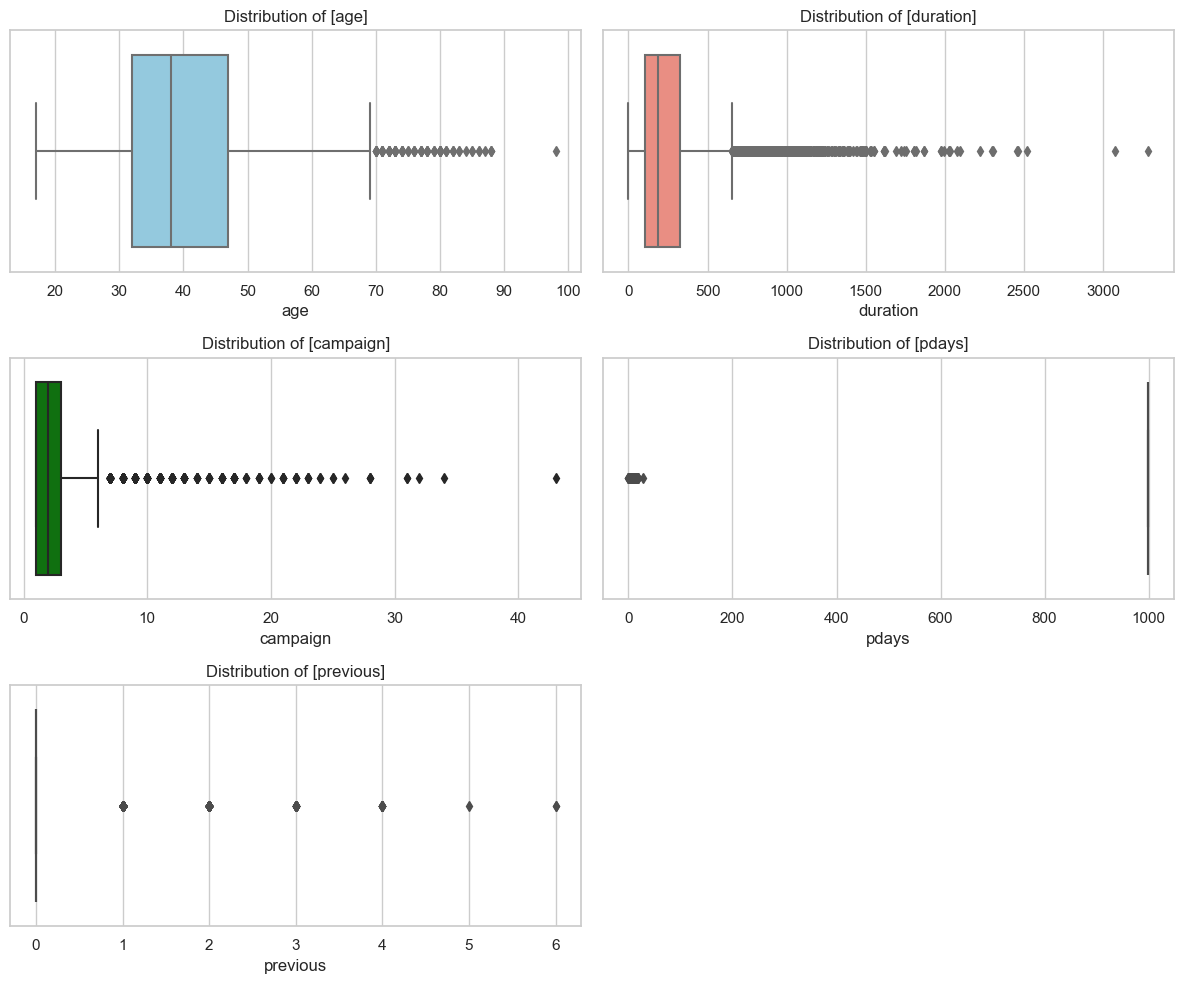

In [396]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
sns.boxplot(data=df, x='age', color='skyblue')
plt.title('Distribution of [age]')

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='duration', color='salmon')
plt.title('Distribution of [duration]')

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='campaign', color='green')
plt.title('Distribution of [campaign]')

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='pdays', color='orange')
plt.title('Distribution of [pdays]')

plt.subplot(3, 2, 5)
sns.boxplot(data=df, x='previous', color='orange')
plt.title('Distribution of [previous]')

plt.tight_layout()
plt.show()

Berikut adalah insight mengenai outliers berdasarkan gambar boxplot diatas:

1. **Outliers pada `age`:**
   - Ada beberapa nasabah yang berusia di atas 60 tahun, yang merupakan outliers dalam distribusi usia. 
   - Usia tertinggi mencapai 98 tahun, jauh di atas usia mayoritas yang berada di bawah 50 tahun.

2. **Outliers pada `duration`:**
   - Terdapat banyak outliers dengan durasi kontak yang sangat panjang, beberapa mencapai lebih dari 3000 detik.
   - Durasi kontak mayoritas berada di bawah 500 detik, sehingga outliers ini sangat signifikan dan dapat mempengaruhi analisis dan model prediktif.

3. **Outliers pada `campaign`:**
   - Sebagian besar nasabah dihubungi antara 1 hingga 3 kali, tetapi terdapat outliers yang dihubungi hingga lebih dari 20 kali, dengan maksimum 43 kali.
   - Outliers ini menunjukkan adanya beberapa nasabah yang dihubungi secara berlebihan dibandingkan dengan mayoritas nasabah lainnya.

4. **Outliers pada `pdays`:**
   - Nilai `pdays` 999 mendominasi, yang menunjukkan banyak nasabah yang tidak dihubungi dalam kampanye sebelumnya. 
   - Selain itu, terdapat beberapa nilai yang jauh lebih kecil yang dapat dianggap sebagai outliers dalam konteks `pdays`.

5. **Outliers pada `previous`:**
   - Mayoritas nasabah tidak memiliki kontak sebelumnya (`previous` = 0), namun terdapat outliers yang dihubungi hingga 6 kali sebelumnya.
   - Outliers ini menunjukkan bahwa ada beberapa nasabah yang telah dihubungi berkali-kali sebelum kampanye ini.

Saya memilih untuk tidak melakukan imputasi atau penghapusan terhadap outliers yang teridentifikasi dalam dataset ini. Keputusan ini diambil untuk memastikan bahwa model machine learning yang dikembangkan dapat belajar dari data dunia nyata yang mencerminkan berbagai kondisi dan variasi yang sebenarnya terjadi. Outliers sering kali mengandung informasi penting yang dapat membantu model dalam mengenali pola dan anomali yang signifikan. Dengan membiarkan outliers apa adanya, model akan menjadi lebih robust dan mampu menangani data yang tidak terduga atau jarang terjadi, sehingga dapat memberikan prediksi yang lebih akurat dan andal dalam situasi nyata. Pendekatan ini memastikan bahwa model yang akan saya buat tidak hanya bekerja optimal dalam kondisi ideal, tetapi juga dapat beradaptasi dengan berbagai skenario yang mungkin dihadapi dalam aplikasi dunia nyata.

## Categorical

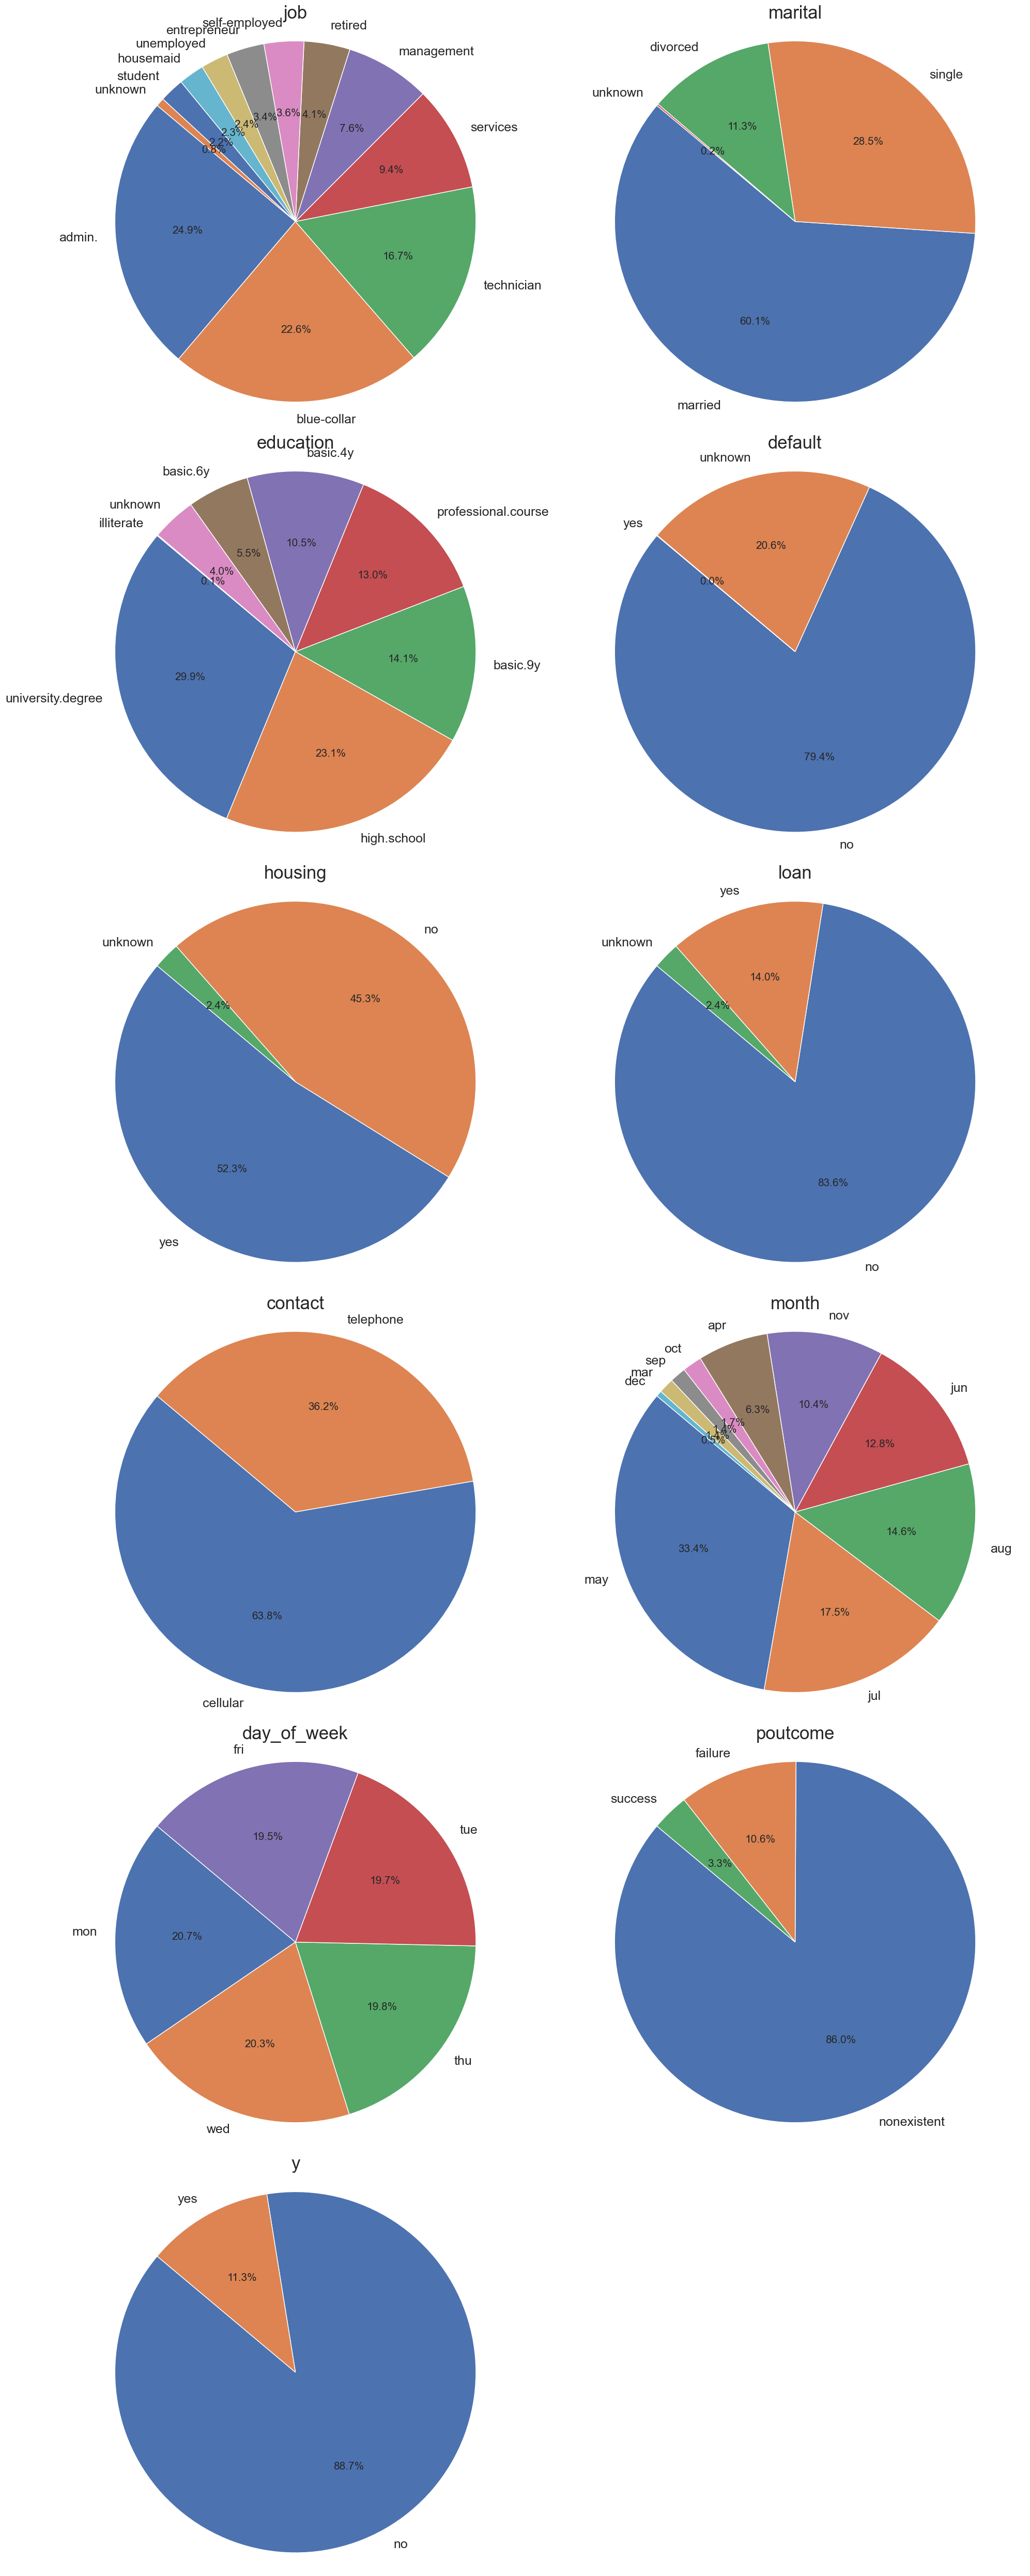

In [397]:
plt.figure(figsize=(20, 50))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    plt.title(column, fontsize=25)
    wedges, texts, autotexts = plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.setp(texts, size=18)  
    plt.setp(autotexts, size=15) 
    plt.axis('equal')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.show()

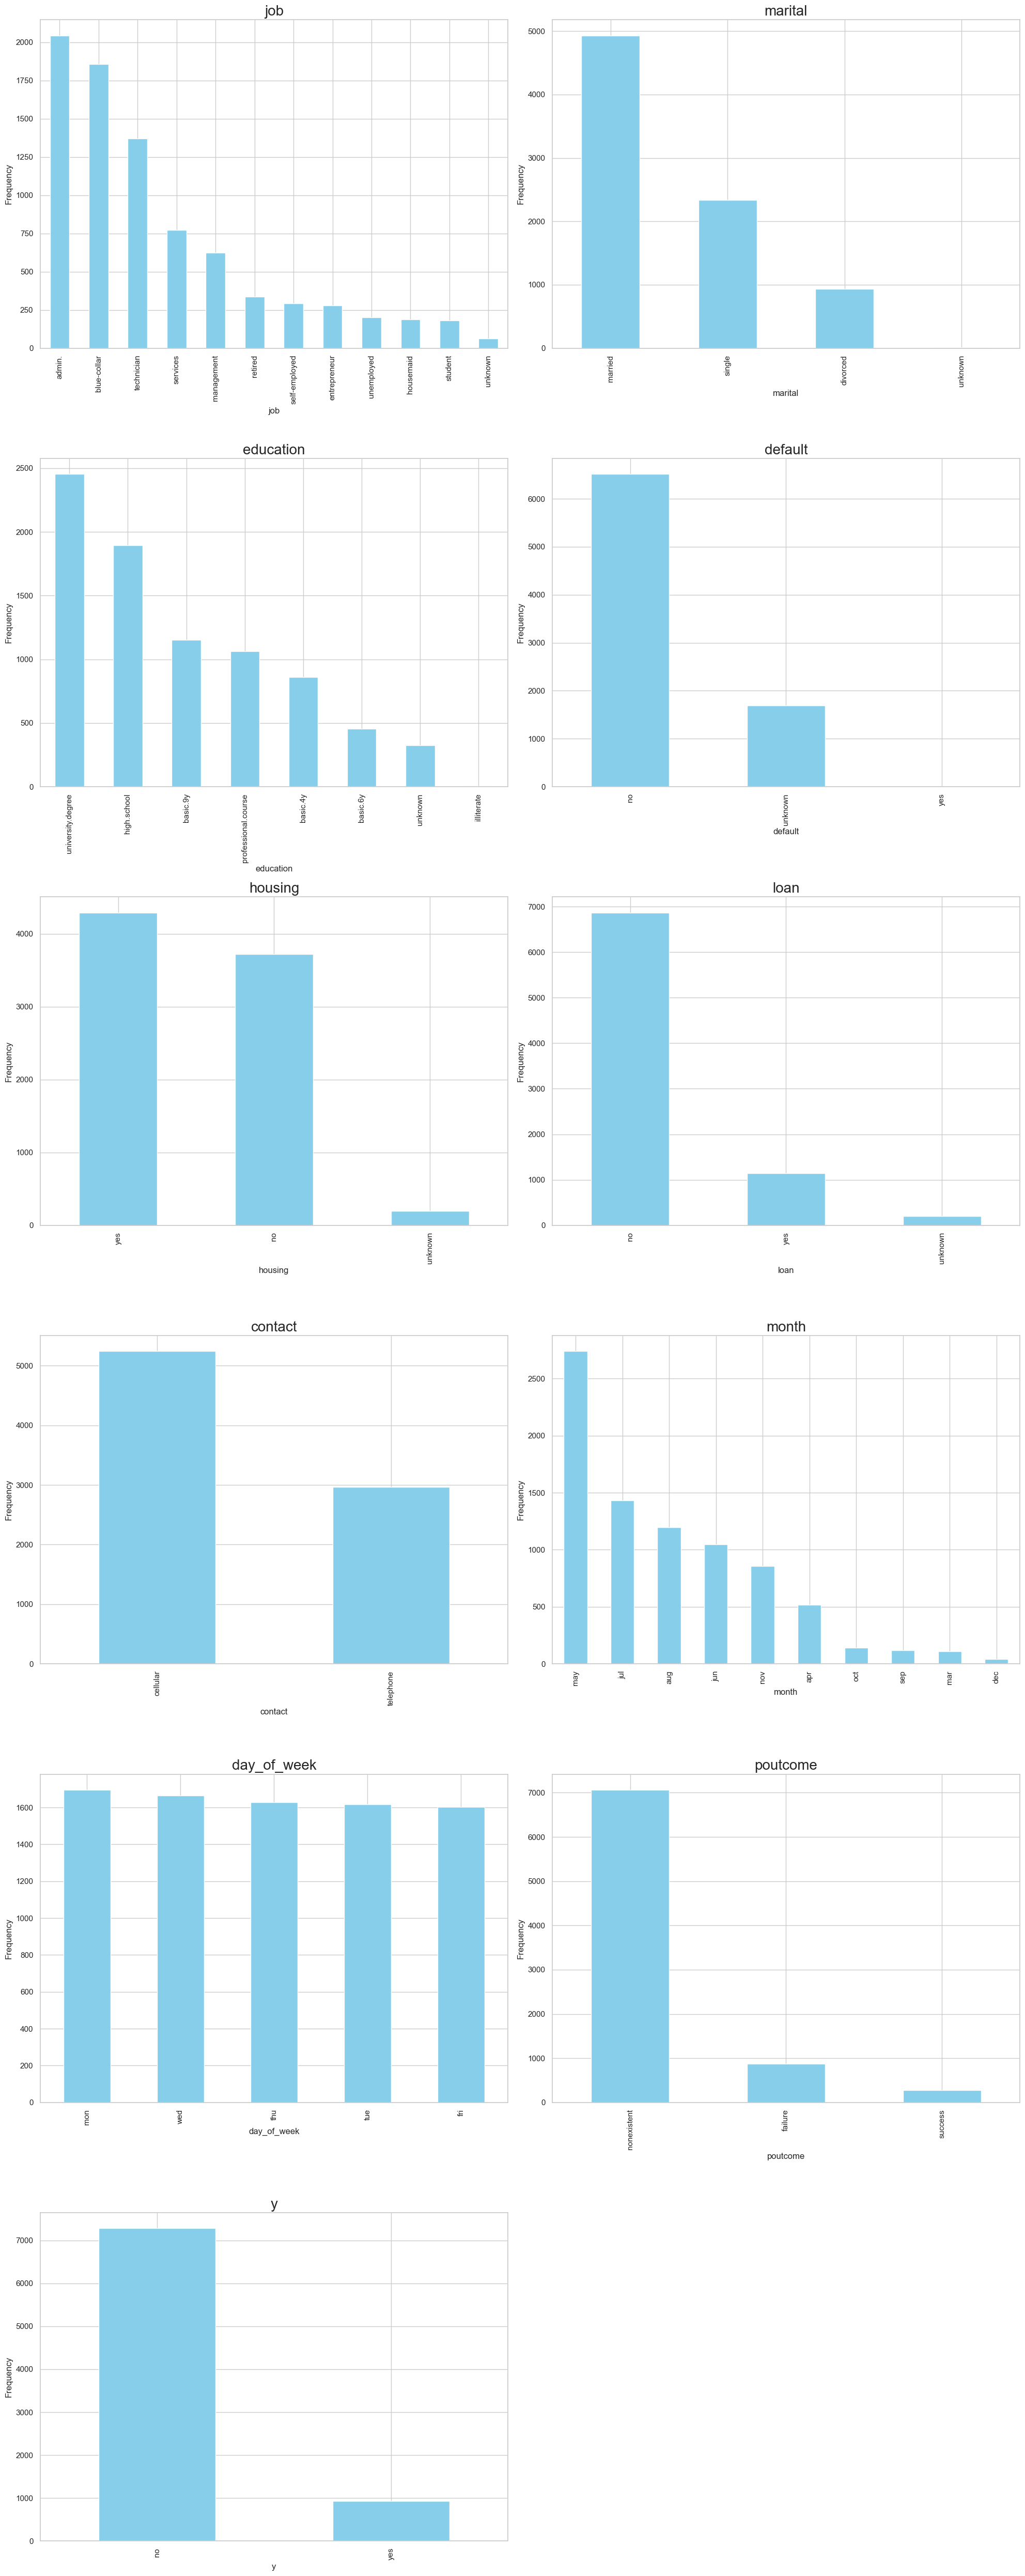

In [398]:
plt.figure(figsize=(20, 50))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    plt.title(column, size = 20)
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.tight_layout()
plt.show()

Berikut adalah beberapa insight yang diperoleh dari data berdasarkan analisis pie chart dan bar chart:

1. **Job:**
   - Pekerjaan 'admin.' adalah yang paling umum dengan 24.9%, diikuti oleh 'blue-collar' (22.6%) dan 'technician' (16.7%).
   - Kategori pekerjaan lainnya memiliki proporsi lebih kecil, dengan 'unknown' dan 'student' memiliki frekuensi terendah.
   - Analisis ini menunjukkan bahwa nasabah dengan pekerjaan administratif dan buruh memiliki frekuensi kontak tertinggi.

2. **Marital:**
   - Status pernikahan 'married' mendominasi dengan 60.1%, diikuti oleh 'single' (28.5%) dan 'divorced' (11.3%).
   - Status 'unknown' sangat jarang terjadi.
   - Sebagian besar nasabah yang dihubungi adalah yang sudah menikah, menunjukkan kemungkinan stabilitas keuangan yang lebih baik.

3. **Education:**
   - Pendidikan 'university.degree' adalah yang paling umum (29.9%), diikuti oleh 'high.school' (23.1%) dan 'basic.9y' (14.1%).
   - Pendidikan 'illiterate' dan 'unknown' memiliki proporsi yang sangat kecil.
   - Ini menunjukkan bahwa nasabah dengan pendidikan tinggi lebih sering dihubungi, mungkin karena dianggap lebih berpotensi untuk berlangganan deposito jangka panjang.

4. **Default:**
   - Mayoritas besar nasabah tidak memiliki kredit macet ('no' sebesar 79.4%), dengan sedikit yang memiliki kredit macet ('yes' sebesar 20.6%).
   - Frekuensi nasabah dengan status 'unknown' sangat kecil.
   - Nasabah tanpa kredit macet lebih dominan, mungkin karena mereka dianggap lebih kredit layak.

5. **Housing:**
   - Sebanyak 52.3% nasabah memiliki pinjaman perumahan ('yes'), sedangkan 45.3% tidak memiliki pinjaman perumahan ('no').
   - Status 'unknown' memiliki proporsi yang sangat kecil (2.4%).
   - Ini menunjukkan hampir setengah nasabah yang dihubungi memiliki komitmen finansial jangka panjang berupa pinjaman perumahan.

6. **Loan:**
   - Sebagian besar nasabah tidak memiliki pinjaman pribadi ('no' sebesar 83.6%), dengan 14.0% memiliki pinjaman pribadi ('yes').
   - Status 'unknown' sangat jarang terjadi.
   - Nasabah yang tidak memiliki pinjaman pribadi lebih dominan, mungkin karena dianggap lebih mampu untuk berinvestasi dalam deposito jangka panjang.

7. **Contact:**
   - Sebagian besar kontak dilakukan melalui 'cellular' (63.8%) dibandingkan 'telephone' (36.2%).
   - Ini menunjukkan preferensi atau efektivitas yang lebih tinggi dalam menggunakan metode komunikasi seluler.

8. **Month:**
   - Bulan 'may' memiliki frekuensi kontak tertinggi (33.4%), diikuti oleh 'jul' (17.5%) dan 'aug' (14.6%).
   - Bulan dengan frekuensi kontak terendah adalah 'dec', 'mar', dan 'sep'.
   - Kampanye lebih intensif dilakukan pada bulan-bulan tertentu, kemungkinan karena strategi pemasaran atau tren musiman.

9. **Day_of_week:**
   - Distribusi kontak cukup merata sepanjang minggu, dengan hari 'mon' (20.7%) dan 'wed' (20.3%) memiliki sedikit keunggulan.
   - Hari 'fri' memiliki frekuensi terendah (19.5%).
   - Kontak lebih sering dilakukan pada awal dan pertengahan minggu.

10. **Poutcome:**
    - Hasil kampanye sebelumnya menunjukkan bahwa 86.0% nasabah belum dihubungi sebelumnya ('nonexistent'), sementara 10.6% mengalami kegagalan ('failure') dan hanya 3.3% yang berhasil ('success').
    - Sebagian besar nasabah yang dihubungi baru pertama kali dihubungi dalam kampanye ini.

11. **Y (Target):**
    - Sebagian besar nasabah tidak berlangganan deposito jangka panjang ('no' sebesar 88.7%), dengan hanya 11.3% yang berlangganan ('yes').
    - Ini menunjukkan tantangan dalam kampanye pemasaran untuk menarik lebih banyak nasabah agar berlangganan deposito jangka panjang.

Insight ini memberikan gambaran yang lebih komprehensif tentang distribusi dan karakteristik data nasabah, yang dapat digunakan untuk menyusun strategi pemasaran yang lebih efektif dan membangun model prediksi yang lebih akurat.

# Feature Engineering

### Feature Encoding (Binary Encoding)

Binary encoding digunakan untuk fitur yang memiliki dua kategori, yang dapat dengan mudah diubah menjadi nilai 0 dan 1. Ini sederhana dan efisien untuk digunakan dalam model machine learning.
- **contact**: Metode kontak hanya memiliki dua kategori (telephone dan cellular), sehingga dapat di-encode sebagai binary (0 dan 1).
- **y**: Apakah seseorang berlangganan atau tidak (yes/no), sehingga dapat di-encode sebagai binary (0 dan 1).

In [399]:
BinaryEncode_contact = {"contact": {"cellular" : 1,"telephone" :0}}
BinaryEncode_y = {"y": {"yes" : 1,"no" :0}}

df = df.replace(BinaryEncode_contact)
df = df.replace(BinaryEncode_y)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,1,nov,wed,648.0,1,999,0,nonexistent,0
1,31,admin.,single,university.degree,no,no,no,1,aug,wed,295.0,1,999,0,nonexistent,0
2,27,blue-collar,single,basic.9y,no,yes,no,0,jul,mon,236.0,2,999,0,nonexistent,0
3,30,services,married,unknown,no,no,no,0,may,wed,143.0,3,999,0,nonexistent,0
4,32,technician,married,university.degree,no,no,no,1,aug,thu,155.0,1,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,33,admin.,single,university.degree,no,no,no,0,may,tue,147.0,1,999,0,nonexistent,0
8233,39,blue-collar,married,basic.9y,no,no,no,0,may,mon,793.0,5,999,0,nonexistent,0
8234,36,admin.,married,university.degree,no,yes,no,0,may,mon,120.0,2,999,0,nonexistent,0
8235,50,admin.,married,university.degree,no,yes,yes,1,nov,fri,189.0,2,999,1,failure,0


### Feature Encoding (Label/Ordinal Encoding)

Label/Ordinal encoding digunakan untuk fitur kategorikal yang memiliki urutan atau level tertentu. Setiap kategori akan diubah menjadi nilai integer yang menunjukkan posisi relatif dari kategori tersebut.
- **education**: Tingkat pendidikan memiliki urutan (unknown < illiterate < basic.4y < basic.6y < basic.9y < high.school < professional.course < university.degree).
- **month**: Bulan juga memiliki urutan alami (jan < feb < mar < apr < may < jun < jul < aug < sep < oct < nov < dec).
- **day_of_week**: Hari dalam minggu memiliki urutan alami (mon < tue < wed < thu < fri < sat < sun).

In [400]:
label_education = {'education': {'unknown':0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'professional.course':6, 'university.degree':7}}
df = df.replace(label_education)

label_month = {'month': {'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}}
df = df.replace(label_month)

label_day_of_week = {'day_of_week': {'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4, 'sat':5, 'sun':6}}
df = df.replace(label_day_of_week)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,4,no,yes,no,1,10,2,648.0,1,999,0,nonexistent,0
1,31,admin.,single,7,no,no,no,1,7,2,295.0,1,999,0,nonexistent,0
2,27,blue-collar,single,4,no,yes,no,0,6,0,236.0,2,999,0,nonexistent,0
3,30,services,married,0,no,no,no,0,4,2,143.0,3,999,0,nonexistent,0
4,32,technician,married,7,no,no,no,1,7,3,155.0,1,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,33,admin.,single,7,no,no,no,0,4,1,147.0,1,999,0,nonexistent,0
8233,39,blue-collar,married,4,no,no,no,0,4,0,793.0,5,999,0,nonexistent,0
8234,36,admin.,married,7,no,yes,no,0,4,0,120.0,2,999,0,nonexistent,0
8235,50,admin.,married,7,no,yes,yes,1,10,4,189.0,2,999,1,failure,0


### Feature Encoding (One Hot Encoding)

One-hot encoding digunakan untuk fitur kategorikal di mana tidak ada urutan atau level yang inheren antar kategori. Ini berarti setiap kategori akan diwakili sebagai kolom terpisah dengan nilai 0 atau 1, yang mengindikasikan kehadiran atau ketidakhadiran kategori tersebut. Metode ini berguna untuk memastikan bahwa model tidak menganggap adanya hubungan ordinal antara kategori-kategori tersebut.
- **job**: Berbagai pekerjaan (admin., blue-collar, technician, dll.) tidak memiliki urutan tertentu dan seharusnya diperlakukan sama.
- **marital**: Status pernikahan (single, married, divorced) tidak memiliki hierarki tertentu.
- **default**: Status kredit macet (yes, no, unknown) juga tidak memiliki urutan.
- **housing**: Status kepemilikan rumah (yes, no, unknown) diperlakukan sama tanpa urutan.
- **loan**: Status pinjaman pribadi (yes, no, unknown) juga tidak memiliki hierarki.
- **poutcome**: Hasil kampanye sebelumnya (success, failure, nonexistent) diperlakukan sama tanpa urutan.

In [401]:
df = pd.get_dummies(df, columns = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
df

,age,education,contact,month,day_of_week,duration,campaign,pdays,previous,y,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,29,4,1,10,2,648.0,1,999,0,0,...,False,False,False,True,True,False,False,False,True,False
1,31,7,1,7,2,295.0,1,999,0,0,...,False,True,False,False,True,False,False,False,True,False
2,27,4,0,6,0,236.0,2,999,0,0,...,False,False,False,True,True,False,False,False,True,False
3,30,0,0,4,2,143.0,3,999,0,0,...,False,True,False,False,True,False,False,False,True,False
4,32,7,1,7,3,155.0,1,999,0,0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,33,7,0,4,1,147.0,1,999,0,0,...,False,True,False,False,True,False,False,False,True,False
8233,39,4,0,4,0,793.0,5,999,0,0,...,False,True,False,False,True,False,False,False,True,False
8234,36,7,0,4,0,120.0,2,999,0,0,...,False,False,False,True,True,False,False,False,True,False
8235,50,7,1,10,4,189.0,2,999,1,0,...,False,False,False,True,False,False,True,True,False,False


# Split Data into Train and Test Data

Melakukan split data terlebih dahulu sebelum melakukan feature scaling, seperti menggunakan robust scaler, sangat penting untuk mencegah kebocoran informasi dari test set ke dalam proses training model. Dengan membagi data menjadi train set dan test set sebelum menerapkan scaling, saya memastikan bahwa scaling dilakukan hanya berdasarkan informasi yang tersedia dalam train set. Hal ini penting karena robust scaler menghitung median dan interquartile range (IQR) dari data untuk melakukan scaling. Jika test set sudah termasuk dalam perhitungan ini, maka akan ada informasi dari test set yang bocor ke dalam train set, yang dapat menyebabkan model overfitting dan memberikan estimasi kinerja yang terlalu optimis. 

Dengan melakukan scaling hanya pada train set, dan kemudian menerapkan transformasi yang sama pada test set, saya memastikan bahwa model hanya belajar dari pola-pola yang sesungguhnya dalam data train tanpa memasukkan informasi yang tidak boleh diakses dari test set. Hal ini menjaga integritas proses evaluasi dan memungkinkan penilaian yang lebih akurat terhadap kinerja model pada data baru yang belum pernah dilihat sebelumnya.

In [402]:
input = df.drop('y', axis = 1)
output = df['y']
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [403]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (6569, 37)
x_test:  (1643, 37)
y_train:  (6569,)
y_test:  (1643,)


### Feature Scaling (Robust Scaler)

Penggunaan RobustScaler dalam preprocessing data sangat penting, terutama dalam kasus ini di mana eksplorasi data menunjukkan adanya outlier pada beberapa kolom numerik. RobustScaler bekerja dengan menghapus median dan menskalakan data sesuai dengan rentang antar kuartil (IQR), yang membuatnya lebih tahan terhadap outlier dibandingkan skaler lain seperti StandardScaler yang mengandalkan mean dan standard deviation. Dengan menggunakan RobustScaler, kita memastikan bahwa outlier yang ekstrem tidak mendistorsi distribusi data dan menyebabkan model untuk belajar pola yang tidak representatif. Ini membantu model untuk menjadi lebih robust dan memberikan performa yang lebih andal pada data baru, sehingga mendukung prediksi yang lebih akurat dan dapat dipercaya dalam situasi dunia nyata.

In [404]:
scaler = RobustScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [405]:
filename = 'robust_scaler.pkl'
pkl.dump(scaler, open(filename, 'wb'))

In [406]:
x_train

,age,education,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
4718,0.266667,5,1,7,1,2.189189,-0.5,0.0,0.0,False,...,False,False,False,True,True,False,False,False,True,False
1183,0.466667,6,1,6,2,0.941441,-0.5,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
1378,0.266667,5,1,4,3,-0.112613,-0.5,0.0,0.0,True,...,False,False,False,True,True,False,False,False,True,False
5810,-0.600000,5,1,4,2,0.472973,-0.5,0.0,0.0,True,...,False,True,False,False,True,False,False,False,True,False
2121,-0.066667,3,0,9,4,-0.243243,-0.5,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-0.266667,5,1,4,3,-0.184685,0.5,0.0,1.0,False,...,False,True,False,False,True,False,False,True,False,False
5212,-0.266667,2,0,4,1,-0.711712,-0.5,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
5411,0.066667,7,1,3,3,0.828829,-0.5,0.0,0.0,False,...,False,False,False,True,True,False,False,False,True,False
861,-0.533333,4,1,10,4,1.072072,0.0,0.0,1.0,False,...,False,False,False,True,True,False,False,True,False,False


In [407]:
x_test

,age,education,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
3150,0.666667,7,1,7,4,-0.536036,1.0,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
3421,0.600000,7,1,4,3,-0.378378,-0.5,0.0,0.0,False,...,False,False,False,True,True,False,False,False,True,False
1377,-0.133333,6,0,4,4,0.040541,-0.5,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
1548,0.666667,4,0,4,3,0.468468,-0.5,0.0,0.0,False,...,False,False,False,True,False,False,True,False,True,False
8192,0.533333,5,1,4,2,-0.274775,-0.5,0.0,0.0,True,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,-0.066667,5,1,3,4,0.959459,0.0,0.0,0.0,False,...,False,False,False,True,False,False,True,False,True,False
6967,0.800000,6,1,4,2,1.081081,0.0,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
6881,-0.400000,5,1,10,4,-0.608108,-0.5,0.0,0.0,False,...,False,True,False,False,True,False,False,False,True,False
5234,-0.533333,4,1,6,2,1.630631,0.0,0.0,0.0,False,...,False,False,False,True,True,False,False,False,True,False


# Modelling

### 1.) Random Forest Classifier

In [27]:
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_predict = rf_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1489
           1       0.53      0.31      0.39       154

    accuracy                           0.91      1643
   macro avg       0.73      0.64      0.67      1643
weighted avg       0.89      0.91      0.90      1643



### 2.) Decision Tree Classifier

In [29]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_predict = dt_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1489
           1       0.42      0.47      0.44       154

    accuracy                           0.89      1643
   macro avg       0.68      0.70      0.69      1643
weighted avg       0.90      0.89      0.89      1643



### 3.) K-Nearest Neighbour

In [31]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_predict = knn_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1489
           1       0.54      0.36      0.44       154

    accuracy                           0.91      1643
   macro avg       0.74      0.67      0.69      1643
weighted avg       0.90      0.91      0.90      1643



### 4.) AdaBoost Classifier

In [33]:
ada_classifier = AdaBoostClassifier(random_state = 42)
ada_classifier.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [34]:
y_predict = ada_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1489
           1       0.55      0.42      0.47       154

    accuracy                           0.91      1643
   macro avg       0.74      0.69      0.71      1643
weighted avg       0.90      0.91      0.91      1643



### 5.) Gradient Boosting Classifier

In [35]:
gb_classifier = GradientBoostingClassifier(random_state = 42)
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
y_predict = gb_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1489
           1       0.53      0.40      0.45       154

    accuracy                           0.91      1643
   macro avg       0.73      0.68      0.70      1643
weighted avg       0.90      0.91      0.90      1643



### 6.) Light GBM Classifier

In [37]:
lightgbm_classifier = LGBMClassifier(random_state=42)
lightgbm_classifier.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 778, number of negative: 5791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 6569, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118435 -> initscore=-2.007334
[LightGBM] [Info] Start training from score -2.007334


LGBMClassifier(random_state=42)

In [38]:
y_predict = lightgbm_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1489
           1       0.50      0.40      0.45       154

    accuracy                           0.91      1643
   macro avg       0.72      0.68      0.70      1643
weighted avg       0.90      0.91      0.90      1643



### 7.) Cat Boost Classifier

In [39]:
lightgbm_classifier = LGBMClassifier(random_state=42)
lightgbm_classifier.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 778, number of negative: 5791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 6569, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118435 -> initscore=-2.007334
[LightGBM] [Info] Start training from score -2.007334


LGBMClassifier(random_state=42)

In [40]:
y_predict = lightgbm_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1489
           1       0.50      0.40      0.45       154

    accuracy                           0.91      1643
   macro avg       0.72      0.68      0.70      1643
weighted avg       0.90      0.91      0.90      1643



### 8.) Extreme Gradient Boosting Classifier

In [41]:
xgboost_classifier = XGBClassifier(random_state=42)
xgboost_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
y_predict = xgboost_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1489
           1       0.53      0.50      0.52       154

    accuracy                           0.91      1643
   macro avg       0.74      0.73      0.73      1643
weighted avg       0.91      0.91      0.91      1643



### 9.) Support Vector Machines Classifier

In [43]:
svc_classifier = SVC(random_state = 42)
svc_classifier.fit(x_train, y_train)

SVC(random_state=42)

In [44]:
y_predict = svc_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1489
           1       0.48      0.19      0.27       154

    accuracy                           0.91      1643
   macro avg       0.70      0.58      0.61      1643
weighted avg       0.88      0.91      0.89      1643



### 10.) Logistic Regression

In [408]:
#Coba nanti ini dihapus
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(x_train, y_train)
y_predict = logistic_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1489
           1       0.62      0.40      0.48       154

    accuracy                           0.92      1643
   macro avg       0.78      0.69      0.72      1643
weighted avg       0.91      0.92      0.91      1643



In [321]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [322]:
y_predict = logistic_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1489
           1       0.62      0.40      0.48       154

    accuracy                           0.92      1643
   macro avg       0.78      0.69      0.72      1643
weighted avg       0.91      0.92      0.91      1643



### 11.) Naive Bayes Classifier

In [49]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train, y_train)

GaussianNB()

In [50]:
y_predict = naive_bayes_classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1489
           1       0.25      0.49      0.33       154

    accuracy                           0.82      1643
   macro avg       0.60      0.67      0.61      1643
weighted avg       0.88      0.82      0.84      1643



# Hyperparameter Tuning

### 1.) Random Forest Classifier

In [75]:
param_grid = {'n_estimators': [50, 100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10],
              'min_samples_split': [2, 5, 10]}

In [76]:
rf_classifier_tuned = RandomForestClassifier(random_state = 42)
rf_classifier_tuned = GridSearchCV(rf_classifier_tuned,
                                   param_grid = param_grid,
                                   scoring = 'accuracy',
                                   cv = 5)

In [77]:
rf_classifier_tuned.fit(x_train,y_train)
print("Tuned Hyperparameters: ", rf_classifier_tuned.best_params_)
print("Accuracy: ", rf_classifier_tuned.best_score_)

Tuned Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy:  0.9033351069564279


### 2.) Logistic Regression

In [78]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

In [79]:
logistic_classifier_tuned = LogisticRegression(random_state=42)
logistic_classifier_tuned = GridSearchCV(logistic_classifier_tuned,
                                         param_grid=param_grid,
                                         scoring='accuracy',
                                         cv=5)

In [80]:
logistic_classifier_tuned.fit(x_train, y_train)
print("Tuned Hyperparameters: ", logistic_classifier_tuned.best_params_)
print("Accuracy: ", logistic_classifier_tuned.best_score_)

Tuned Hyperparameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Accuracy:  0.9027259311811054


# Evaluation

In [81]:
rf_classifier_best_tuned = rf_classifier_tuned.best_estimator_
y_predict = rf_classifier_best_tuned.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1489
           1       0.51      0.29      0.37       154

    accuracy                           0.91      1643
   macro avg       0.72      0.63      0.66      1643
weighted avg       0.89      0.91      0.90      1643



In [82]:
logistic_classifier_best_tuned = logistic_classifier_tuned.best_estimator_
y_predict = logistic_classifier_best_tuned.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1489
           1       0.60      0.37      0.46       154

    accuracy                           0.92      1643
   macro avg       0.77      0.67      0.71      1643
weighted avg       0.91      0.92      0.91      1643



### Analisis

1. **Keseimbangan Kelas (Class Imbalance)**:
   - Dataset menunjukkan ketidakseimbangan kelas yang cukup signifikan. Terdapat 1489 contoh kelas 0 (tidak berlangganan) dibandingkan dengan hanya 154 contoh kelas 1 (berlangganan). Ini terlihat dari support pada masing-masing kelas.

2. **Precision**:
   - **Random Forest**: Precision untuk kelas 0 adalah 0.93 dan untuk kelas 1 adalah 0.51. Ini berarti bahwa ketika model memprediksi 'berlangganan' (kelas 1), 51% dari prediksi tersebut benar. Namun, ini juga menunjukkan bahwa ada cukup banyak prediksi salah positif untuk kelas 1.
   - **Logistic Regression**: Precision untuk kelas 0 adalah 0.94 dan untuk kelas 1 adalah 0.60. Logistic Regression memiliki precision yang lebih baik untuk kelas 1 dibandingkan dengan Random Forest, menunjukkan bahwa ketika model memprediksi 'berlangganan', 60% dari prediksi tersebut benar.

3. **Recall**:
   - **Random Forest**: Recall untuk kelas 0 adalah 0.97 dan untuk kelas 1 adalah 0.29. Ini berarti bahwa model berhasil mengidentifikasi 97% dari total contoh kelas 0, tetapi hanya 29% dari total contoh kelas 1. Recall yang rendah untuk kelas 1 menunjukkan bahwa model sering gagal mengidentifikasi contoh 'berlangganan'.
   - **Logistic Regression**: Recall untuk kelas 0 adalah 0.97 dan untuk kelas 1 adalah 0.37. Logistic Regression juga menunjukkan perbaikan pada recall untuk kelas 1 dibandingkan dengan Random Forest, tetapi masih cukup rendah.

4. **F1-Score**:
   - **Random Forest**: F1-score untuk kelas 0 adalah 0.95 dan untuk kelas 1 adalah 0.37. F1-score yang rendah untuk kelas 1 menunjukkan bahwa performa model kurang baik dalam mengidentifikasi nasabah yang berpotensi berlangganan.
   - **Logistic Regression**: F1-score untuk kelas 0 adalah 0.96 dan untuk kelas 1 adalah 0.46. Logistic Regression menunjukkan perbaikan pada F1-score untuk kelas 1 dibandingkan dengan Random Forest, tetapi masih ada ruang untuk perbaikan.

5. **Akurasi Keseluruhan**:
   - **Random Forest**: Akurasi keseluruhan adalah 0.91.
   - **Logistic Regression**: Akurasi keseluruhan adalah 0.92.
   - Meskipun akurasi keseluruhan tinggi untuk kedua model, ini sebagian besar disebabkan oleh ketidakseimbangan kelas. Akurasi tinggi tidak selalu menunjukkan kinerja yang baik pada kelas minoritas (kelas 1).

### F1 Score

Memilih F1-score sebagai acuan utama sangat penting bagi perusahaan karena metrik ini mencerminkan keseimbangan antara precision dan recall, yang memiliki implikasi langsung terhadap efisiensi dan efektivitas strategi pemasaran serta manajemen hubungan pelanggan. Precision yang tinggi memastikan bahwa nasabah yang diidentifikasi sebagai berpotensi berlangganan memang benar-benar tertarik, sehingga sumber daya pemasaran tidak terbuang sia-sia pada nasabah yang tidak tertarik. Hal ini mengoptimalkan penggunaan anggaran pemasaran dan meningkatkan Return on Investment (ROI).

Di sisi lain, recall yang tinggi memastikan bahwa sebanyak mungkin nasabah yang berpotensi berlangganan berhasil diidentifikasi, memaksimalkan peluang konversi dan peningkatan penjualan. Ini penting untuk mengembangkan basis pelanggan yang lebih besar dan meningkatkan pendapatan perusahaan dari produk deposito jangka panjang.

Dengan menyeimbangkan precision dan recall melalui F1-score, perusahaan dapat mencapai keseimbangan optimal antara menghindari false positives (nasabah yang dikira tertarik tetapi sebenarnya tidak) dan false negatives (nasabah yang sebenarnya tertarik tetapi tidak diidentifikasi). Kesalahan klasifikasi dapat berdampak buruk: false positives menyebabkan sumber daya terbuang, sementara false negatives mengakibatkan hilangnya peluang bisnis potensial.

Oleh karena itu, menggunakan F1-score sebagai metrik utama membantu perusahaan memastikan bahwa model machine learning yang digunakan tidak hanya akurat, tetapi juga efektif dalam mendukung strategi pemasaran yang lebih cerdas dan tepat sasaran. Ini akan berkontribusi pada peningkatan kepuasan nasabah, efisiensi operasional, dan pada akhirnya, profitabilitas perusahaan.

### Kesimpulan

Evaluasi dua model machine learning, yaitu Random Forest dan Logistic Regression, telah dilakukan untuk memprediksi nasabah yang berpotensi berlangganan deposito jangka panjang. Analisis menunjukkan bahwa Logistic Regression unggul dalam hal F1-score untuk kelas berlangganan, yang mencerminkan keseimbangan optimal antara precision dan recall. Pemilihan F1-score sebagai metrik utama sangat penting karena memastikan model mampu mengidentifikasi nasabah potensial dengan akurasi tinggi tanpa mengabaikan peluang konversi, sekaligus meminimalkan alokasi sumber daya yang tidak efisien. Dengan menggunakan Logistic Regression sebagai model terbaik berdasarkan F1-score, perusahaan dapat mengarahkan upaya pemasaran dengan lebih tepat sasaran, meningkatkan efektivitas kampanye, dan pada akhirnya, mencapai hasil bisnis yang lebih baik. Hal ini memberikan dasar yang kuat untuk strategi pemasaran berbasis data yang lebih cerdas dan efektif dalam menarik lebih banyak nasabah untuk berlangganan produk deposito jangka panjang.

# Save Best Model as Pickle

In [409]:
filename = 'logistic_classifier_best.pkl'
pkl.dump(logistic_classifier, open(filename, 'wb'))